In [1]:
import numpy as np
import pandas as pd

data = pd.read_csv(r"C:\Users\atzeh\OneDrive\Documenten\TU\MASTER\Thesis\Solomon fig 2A.csv")
print(data)
# Example data
x = np.array([0, 1, 2, 3, 4])
y = np.array([0, 1, 4, 9, 16])  # y = x^2

# Integration using trapezoidal rule
area = np.trapz(y, x)
print("Area under the curve (trapezoidal):", area)

    0   0016859852476290987; 5  994917012866949
0   0   0010537407797682197; 4    9992329090109
1   0   0007376185458377454; 4     330656589518
2   0   0005268703898841098; 3   72994763595275
3   0  00031612223393047423; 2  112923868238326
4   0   0005268703898841098; 1  149623116085138
5   0   0023182297154900194; 7    9758204845575
6   0    003055848261327737; 8    5361562281742
7   0    004847207586933647; 9     157455518845
8   0   007481559536354071; 10   13464465519291
9   0   010115911485774495; 11    7614387397126
10  0    01211801896733404; 12      22487877944
11  0    01464699683877764; 13   15636544214782
12  0    02444678609062159; 14     429570953903
13  0   027397260273972643; 14  998203392157127
14  0   024236037934668095; 15  996794367129748
15  0   020653319283456276; 16  995708327782037
16  0   016965226554267715; 17  994703034854215
17  0   013909378292939992; 18  993213263406968
18  0   011064278187565904; 19  991561999119856
19  0   009062170706006373; 21     84218

In [2]:
solomon2a = pd.DataFrame([[0.0001854192325394105, 1.6760205306716358],
[0.00007998758882755974, 3.1871434647039862],
[0.0007241193809726654, 4.394205755016593],
[0.0008176061346653052, 5.14202366343055],
[0.0014678830690251082, 5.947804960295812],
[0.0019501927828495247, 7.039453498451998],
[0.003277274861129942, 8.193814114809236],
[0.0045146848750924895, 8.921871863815035],
[0.006968188311335097, 9.9054170133031],
[0.00967426716660591, 10.957345865795272],
[0.011888331684554762, 11.94405611283323],
[0.014840417708486583, 13.10462556406798],
[0.01951455391304527, 13.688558410620825],
[0.024926711623586895, 14.090995634004027],
[0.028370811984840663, 14.617864985609582],
[0.02541872596090887, 15.64260961957024],
[0.0219746255996551, 16.62918319595894],
[0.018530525238401332, 17.596589218730298],
[0.015332432045808544, 18.568066186620708],
[0.012626353190537731, 19.595816901610572],
[0.010166281503927899, 20.58163643303786],
[0.007952216985979046, 21.71933004525574],
[0.00587918851885956, 23.066480836754437],
[0.004730349144817889, 24.0735512519412],
[0.003980843274695958, 24.853073667668436],
[0.003524087950081342, 25.613736631903322],
[0.0026630628597679035, 26.732503715589736],
[0.0019361227577787132, 28.233560746824715],
[0.0016231544619080274, 30.11416215292198],
[0.0014149945499641048, 31.53138272395247],
[0.0008528651473726639, 32.574883345932776],
[0.00043533127689344975, 34.00439288571958],
[0.0, 35]],
                         columns = ['RF', 'altitude'],)
print(solomon2a)


area = np.trapz(solomon2a['RF'], solomon2a['altitude'])
print(area)

print(f'This means that the total RF for a ppmv change is about {area} W/m^2') #TODO Not sure



          RF   altitude
0   0.000185   1.676021
1   0.000080   3.187143
2   0.000724   4.394206
3   0.000818   5.142024
4   0.001468   5.947805
5   0.001950   7.039453
6   0.003277   8.193814
7   0.004515   8.921872
8   0.006968   9.905417
9   0.009674  10.957346
10  0.011888  11.944056
11  0.014840  13.104626
12  0.019515  13.688558
13  0.024927  14.090996
14  0.028371  14.617865
15  0.025419  15.642610
16  0.021975  16.629183
17  0.018531  17.596589
18  0.015332  18.568066
19  0.012626  19.595817
20  0.010166  20.581636
21  0.007952  21.719330
22  0.005879  23.066481
23  0.004730  24.073551
24  0.003981  24.853074
25  0.003524  25.613737
26  0.002663  26.732504
27  0.001936  28.233561
28  0.001623  30.114162
29  0.001415  31.531383
30  0.000853  32.574883
31  0.000435  34.004393
32  0.000000  35.000000
0.2419944638142279
This means that the total RF for a ppmv change is about 0.2419944638142279 W/m^2


In [3]:
# for 35 deg N :
# [ppmv, altitude[km]]
myhre2a = pd.DataFrame([
    [0.0, 11.3874],
    [0.2, 15.5836],
    [0.4, 18.0068],
    [0.6, 21.4347],
    [0.8, 25.7491],
    [1.0, 29.7680],
    [1.2, 33.3141],
    [1.4, 37.6876],
    [1.6, 43.7160],
    [1.8, 53.6451]], columns = ['ppmv', 'altitude'])



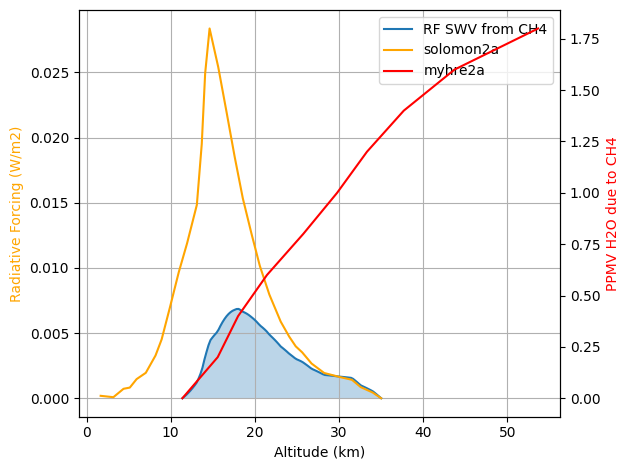

So the RF from the CH4 change is  0.07558949552851962 W/m2
Myhre said 0.083, so we are pretty close


In [4]:
from scipy.interpolate import interp1d

# Interpolate both functions to a common set of x-values
x_common = np.linspace(max(min(solomon2a['altitude']), min(myhre2a['altitude'])), min(max(solomon2a['altitude']), max(myhre2a['altitude'])), 100)

f_interp = interp1d(solomon2a['altitude'], solomon2a['RF'], kind='linear')
g_interp = interp1d(myhre2a['altitude'], myhre2a['ppmv'], kind='linear')

y_product = f_interp(x_common) * g_interp(x_common)
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

# Plotting on ax1
line1, = ax1.plot(x_common, y_product, label='RF SWV from CH4')
line2, = ax1.plot(solomon2a['altitude'], solomon2a['RF'], label='solomon2a', color='orange')
ax1.fill_between(x_common, y_product, alpha=0.3)

# Plotting on ax2
line3, = ax2.plot(myhre2a['altitude'], myhre2a['ppmv'], label='myhre2a', color='red')

# Set axis labels
ax1.set_xlabel('Altitude (km)')
ax1.set_ylabel('Radiative Forcing (W/m2)', color='orange')
ax2.set_ylabel('PPMV H2O due to CH4', color='red')

# Combine legends from both axes
lines = [line1, line2, line3]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc='best')

ax1.grid(True)
fig.tight_layout()  # Prevent overlap
plt.show()

mult_area = np.trapz(y_product, x_common)
print("So the RF from the CH4 change is ",mult_area,"W/m2\n"
                                                    "Myhre said 0.083, so we are pretty close")


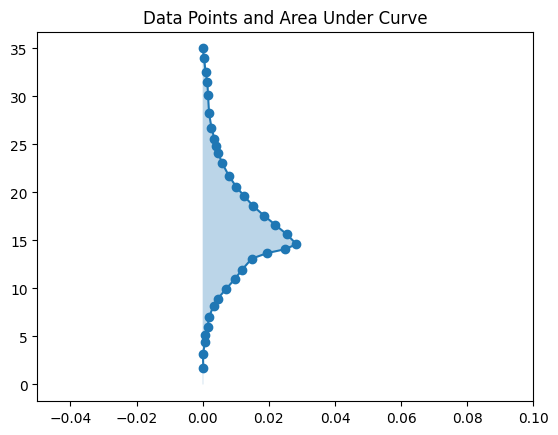

In [5]:
import matplotlib.pyplot as plt

plt.plot(solomon2a['RF'], solomon2a['altitude'], marker='o')
plt.fill_between(solomon2a['RF'], solomon2a['altitude'], alpha=0.3)
plt.title("Data Points and Area Under Curve")
plt.xlim(-0.05,0.10)
plt.show()

In [6]:
import numpy as np
import pandas as pd

def ppmv_to_mass_profile(ppmv):
    """
    Convert water vapor from ppmv to kilograms per layer.
    all ISA based
    values for layers based on lowest isa value

    Parameters:
    - ppmv: array-like, water vapor concentration [ppmv] at each level
    - pressure: array-like, pressure at each level [hPa] (center value for each layer)
    # - temperature: array-like, temperature at each level [K]
    # - area: float, optional area in m² over which to compute total mass

    Returns:
    - mass_per_layer: array of mass of water vapor per layer [grams]
    - total_mass: total mass over the area (if area is provided) [grams]
    """

    # ISA atmosphere
    path_ISA = r"C:\Users\atzeh\OneDrive\Documenten\TU\MASTER\Thesis\Planning MSc 1.xlsb.xlsx"
    ISA = pd.read_excel(path_ISA, sheet_name='ISA',)
    ISA = ISA.drop(0) # remove the unit row

    # Constants
    M_dry_air = 0.028964 # kg/mol
    M_h2o = 0.018015     # kg/mol
    g = 9.80665          # m/s²

    ppmv = np.asarray(ppmv)

    # Convert ppmv to mass mixing ratio
    mixing_ratio = M_h2o/M_dry_air * ppmv / 1e6  # unitless (kg H2O / kg air)

    # Surface area of a layer A = 4piR**2
    R = 6371 #km
    area = 4 * np.pi * (R+ISA['Altitude'])**2 # km**2
    # print(area)

    # Compute pressure layer thickness (assume midpoint method for vertical integral)
    dp = -np.diff(ISA['Pressure'])
    dp = np.append(dp, dp[-1])  # Extend last value to match array length

    # Mass of air in each layer per m² column: (dp / g)
    mass_air_column = dp / g  # kg/m²
    mass_air_layer = mass_air_column * area * 10**6 # km^2->m^2

    # Mass of water vapor per layer:
    mass_water_layer = mixing_ratio * mass_air_layer  # kg

    return list(mass_water_layer), list(mass_air_layer)


ppmv_profile = np.ones(51)        # ppmv


mass_water_layer, mass_air_layer = ppmv_to_mass_profile(ppmv_profile)

print("Mass water per layer", mass_water_layer, "kg")
print("Total mass air per layer:", mass_air_layer, "kg")
# print("Total water/air:", (mass_water_layer/ 1e9)/(mass_air_layer/ 1e9)*1e6)


Mass water per layer [370425422182.85223, 335883522742.1079, 303854512965.00385, 274211250564.13806, 246829670530.2596, 221588790149.86215, 198367472885.46475, 177050912627.61282, 157530643801.78906, 139701307290.16116, 123454165048.70506, 107180585595.73154, 91572213735.29858, 78237570300.46297, 66844123809.21726, 57110928807.658966, 48796352159.20304, 41689678954.61246, 35618643976.553566, 30432244047.251423, 25945429989.732426, 22081684125.472633, 18807064640.79108, 16029586402.017118, 13672468131.450762, 11670243740.785976, 9968127836.287495, 8520727504.296034, 7288467177.743651, 6238250707.013807, 5343798101.228794, 4580135668.55625, 3914318046.678683, 3337481181.8374505, 2851081999.702467, 2440160326.2908716, 2092256438.048959, 1797120441.2711895, 1546355626.7417262, 1332766422.2699394, 1150687858.3134196, 995004921.6291564, 861808988.8072095, 747612788.757881, 649482260.700785, 565135848.852017, 492420415.3810121, 431757242.0501203, 380684796.6994713, 335644564.5743788, 33574913

[370425422182.85223, 335883522742.1079, 303854512965.00385, 274211250564.13806, 246829670530.2596, 221588790149.86215, 198367472885.46475, 177050912627.61282, 157530643801.78906, 139701307290.16116, 123454165048.70506, 107180585595.73154, 91572213735.29858, 78237570300.46297, 66844123809.21726, 57110928807.658966, 48796352159.20304, 41689678954.61246, 35618643976.553566, 30432244047.251423, 25945429989.732426, 22081684125.472633, 18807064640.79108, 16029586402.017118, 13672468131.450762, 11670243740.785976, 9968127836.287495, 8520727504.296034, 7288467177.743651, 6238250707.013807, 5343798101.228794, 4580135668.55625, 3914318046.678683, 3337481181.8374505, 2851081999.702467, 2440160326.2908716, 2092256438.048959, 1797120441.2711895, 1546355626.7417262, 1332766422.2699394, 1150687858.3134196, 995004921.6291564, 861808988.8072095, 747612788.757881, 649482260.700785, 565135848.852017, 492420415.3810121, 431757242.0501203, 380684796.6994713, 335644564.5743788, 335749134.8874993]
[ 0  1  2 

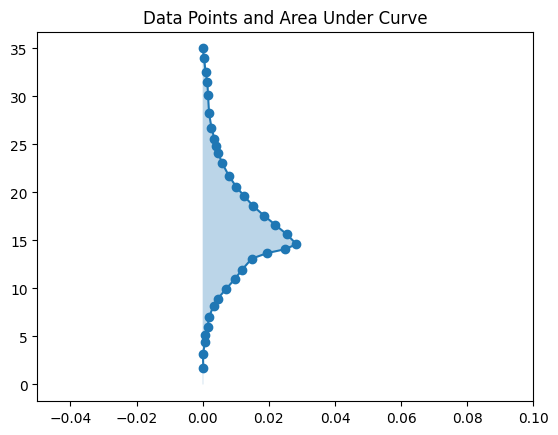

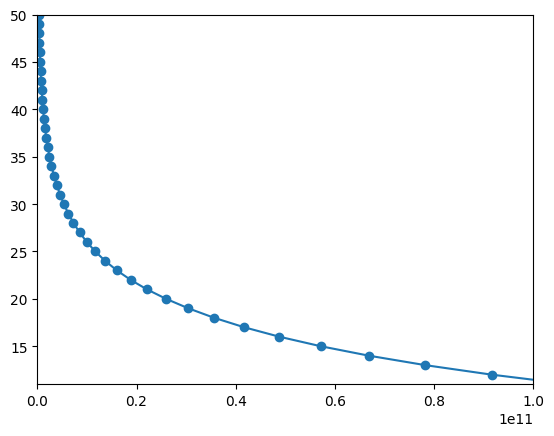

[0.0026995987319314504, 0.002977222555712571, 0.0032910487003863396, 0.0036468233813991514, 0.004051376797010337, 0.004512863666630846, 0.0050411490626660815, 0.005648092885594311, 0.006347971263662436, 0.007158129149951252, 0.008100172234816707, 0.009330047922781875, 0.010920343182819958, 0.012781583018997237, 0.014960178143020374, 0.017509783519155324, 0.020493335172625173, 0.02398675223881431, 0.028075184464020107, 0.03285988369596812, 0.038542433114260866, 0.045286400906642627, 0.05317150863782734, 0.06238464143243039, 0.07313968409988107, 0.0856880132250478, 0.10031974071998233, 0.11736087082890678, 0.1372030600691513, 0.16030134840135188, 0.18713281846671048, 0.2183341438694151, 0.2554723423275492, 0.29962715758278824, 0.3507440333544802, 0.40980913804136576, 0.47795288465332936, 0.5564457323142193, 0.6466817740412445, 0.7503190231164598, 0.8690454086008302, 1.0050201544356836, 1.1603499301905105, 1.3375908157770373, 1.5396879337720628, 1.7694860484100234, 2.030785013708756, 2.31

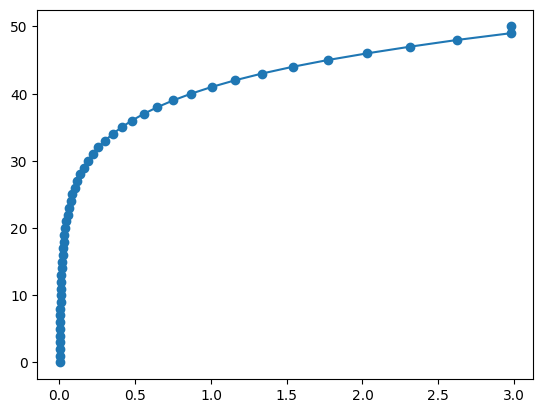

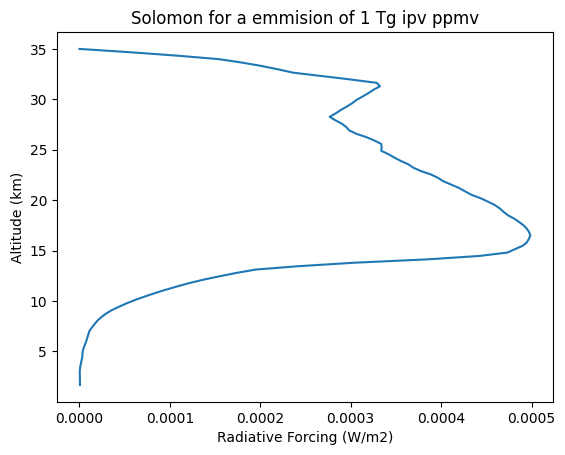

In [7]:
import matplotlib.pyplot as plt
print(mass_water_layer)
print(np.arange(0,51,1))



plt.plot(solomon2a['RF'], solomon2a['altitude'], marker='o')
plt.fill_between(solomon2a['RF'], solomon2a['altitude'], alpha=0.3)
plt.title("Data Points and Area Under Curve")
plt.xlim(-0.05,0.10)
plt.show()


plt.plot(mass_water_layer,np.arange(0,51,1), marker='o')
plt.ylim(11,50)
plt.xlim(0, 1e11)

plt.show()
inverses = [1/(x/10**9) if x != 0 else None for x in mass_water_layer] # 10**9 to make it Tg
print(inverses)
plt.plot(inverses,np.arange(0,51,1), marker='o')
# plt.xscale('log')
plt.show()


x_common = np.linspace(max(min(solomon2a['altitude']), 0), min(max(solomon2a['altitude']), 50), 100)

f_interp = interp1d(solomon2a['altitude'], solomon2a['RF'], kind='linear')
g_interp = interp1d(np.arange(0,51,1), inverses, kind='linear')

y_product = f_interp(x_common) * g_interp(x_common)
plt.title("Solomon for a emmision of 1 Tg ipv ppmv")
plt.ylabel("Altitude (km)")
plt.xlabel("Radiative Forcing (W/m2)")
plt.plot(y_product,x_common)
plt.show()

In [8]:

inverses = [1/x if x != 0 else None for x in mass_water_layer]
print(inverses)

[2.6995987319314504e-12, 2.977222555712571e-12, 3.2910487003863392e-12, 3.6468233813991515e-12, 4.051376797010337e-12, 4.512863666630846e-12, 5.0411490626660816e-12, 5.648092885594312e-12, 6.347971263662436e-12, 7.158129149951252e-12, 8.100172234816708e-12, 9.330047922781876e-12, 1.0920343182819958e-11, 1.2781583018997236e-11, 1.4960178143020376e-11, 1.7509783519155326e-11, 2.0493335172625173e-11, 2.3986752238814305e-11, 2.8075184464020106e-11, 3.2859883695968125e-11, 3.854243311426087e-11, 4.528640090664263e-11, 5.317150863782734e-11, 6.23846414324304e-11, 7.313968409988108e-11, 8.56880132250478e-11, 1.0031974071998234e-10, 1.1736087082890678e-10, 1.3720306006915133e-10, 1.6030134840135187e-10, 1.8713281846671046e-10, 2.1833414386941511e-10, 2.5547234232754917e-10, 2.996271575827882e-10, 3.5074403335448015e-10, 4.098091380413658e-10, 4.779528846533295e-10, 5.564457323142193e-10, 6.466817740412446e-10, 7.503190231164598e-10, 8.690454086008302e-10, 1.0050201544356836e-09, 1.160349930190

In [9]:
 # lets say stratosphere starts from 14 km onwards
# Pletzer flights ar until 38 km
# So lets say the emmision is equally devided fro 14 to 38 km
# average mass sensitivity will be:
mass_water_layer[14] # 0 = 0 to 1km so 14 = 14 to 15 km
mass_water_layer[14:38] # So from 14-39 km
avg_sensitivity = sum(mass_water_layer[14:38])/len(mass_water_layer[14:38])
total_mass = sum(mass_water_layer[14:38])
print(avg_sensitivity/1e9, "Tg")
print(total_mass/1e9, "Tg")

18.627932258904263 Tg
447.07037421370234 Tg


In [10]:
 # pletzer formula: TODO not valid for large numbers as we passed the top of the curve
x = 447
net_RF = -0.00088*(x**2)+0.47373*x-0.74676
print(net_RF)

35.17862999999999


In [11]:
# Grewe formula

a = 0.438 #mW/m2/Tg
RF_grewe = a*x
print(RF_grewe)
print("RF grewe:  ", RF_grewe/1000,"W/m^2 (integral from solomon gives 0.2418, which is compareable....")
print("RF myhre:  ",0.083,"W/m^2")
print("RF solomon:", 0.066,"W/m^2 (even 0.07533 if 0.0 will be taken into account)")
print("Note that the grewe mass is for an 1ppmv increase on all levels between 14 and 38, this is not comparable with the ppmv change due to ch4")


195.786
RF grewe:   0.195786 W/m^2 (integral from solomon gives 0.2418, which is compareable....
RF myhre:   0.083 W/m^2
RF solomon: 0.066 W/m^2 (even 0.07533 if 0.0 will be taken into account)
Note that the grewe mass is for an 1ppmv increase on all levels between 14 and 38, this is not comparable with the ppmv change due to ch4


In [12]:
print("RF grewe:", RF_grewe/1000,)


RF grewe: 0.195786
